In [12]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import torch
print(f"Torch version: {torch.__version__}")
print(f"Backend MPS: {'Available' if torch.backends.mps.is_built() else 'Not available'}")
print(f"Keras version : {keras.__version__}")
print(f"Keras backend: {keras.backend.backend()}")

Torch version: 2.4.0
Backend MPS: Available
Keras version : 3.4.1
Keras backend: torch


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [14]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target_name'] = data.target.map({i:name for i,name in enumerate(iris.target_names)})

[]

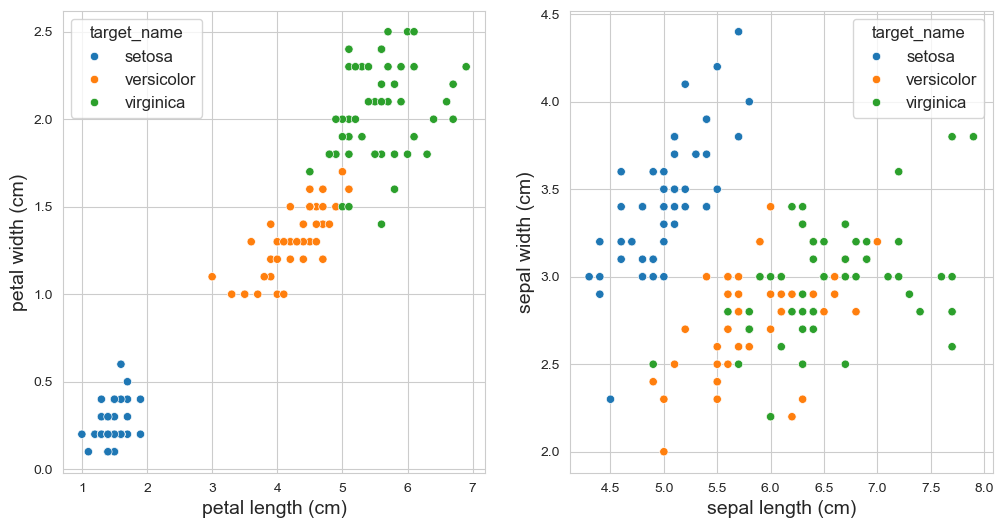

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data,x='petal length (cm)',y='petal width (cm)', hue='target_name',ax=axs[0]);
sns.scatterplot(data,x='sepal length (cm)',y='sepal width (cm)', hue='target_name',ax=axs[1]);
plt.plot()

In [ ]:

model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

iris_model = model.fit(x_train_new, y_train, epochs=700, batch_size=7)

In [78]:
from keras.utils import plot_model
from keras import layers, regularizers

regularizers.l1_l2(l1=0.001, l2=0.001)
input_layer = layers.Input(shape=(4,), name="input-layer")

x = layers.Dense(10, activation="relu", kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), name="Dense10")(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3, name='Dropout1')(x)

x = layers.Dense(7, activation="relu", kernel_initializer='he_normal',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), name="Dense7")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3, name='Dropout2')(x)

x = layers.Dense(5, activation="relu", kernel_initializer='he_normal',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), name="Dense5")(x)

output = layers.Dense(3, activation="softmax", name="Output")(x)

model = keras.Model(input_layer, output)
model.compile(optimizer="adam", 
              loss="categorical_crossentropy",  # Utilisez categorical_crossentropy pour des étiquettes one-hot
              metrics=["accuracy"])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input-layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense10 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense7 (Dense)                  │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout2 (Dropout)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense5 (Dense)                  │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 34 (136.00 B)

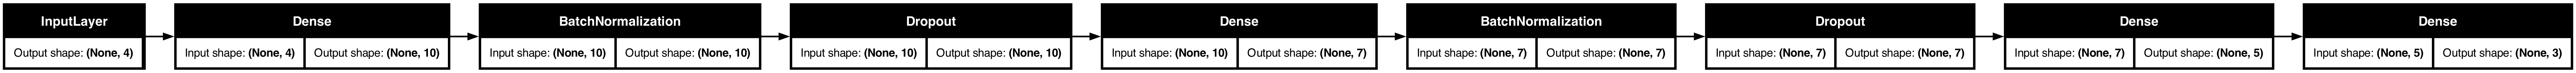

In [134]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR", to_file='model/iris_keras.png')

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target)

scaler = StandardScaler()

X_train_scld = scaler.fit_transform(X_train)
X_test_scld = scaler.transform(X_test)

y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [86]:
model.fit(X_train_scld,y_train_cat, epochs=200, validation_split=0.2, batch_size=7)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8211 - loss: 0.7743 - val_accuracy: 0.8696 - val_loss: 0.3768
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8632 - loss: 0.5946 - val_accuracy: 0.9130 - val_loss: 0.3777
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8564 - loss: 0.7112 - val_accuracy: 0.8696 - val_loss: 0.3667
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8090 - loss: 0.9358 - val_accuracy: 0.8696 - val_loss: 0.3580
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8480 - loss: 0.6325 - val_accuracy: 0.9130 - val_loss: 0.3758
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9308 - loss: 0.4314 - val_accuracy: 0.9130 - val_loss: 0.3666
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8491 - loss: 0.6366 - val_accuracy: 0.8696 - val_loss: 0.3534
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8516 - loss: 0.6073 - val_accuracy: 0

In [88]:
model.evaluate(X_test_scld, y_test_cat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.1569


[0.1543896496295929, 1.0]

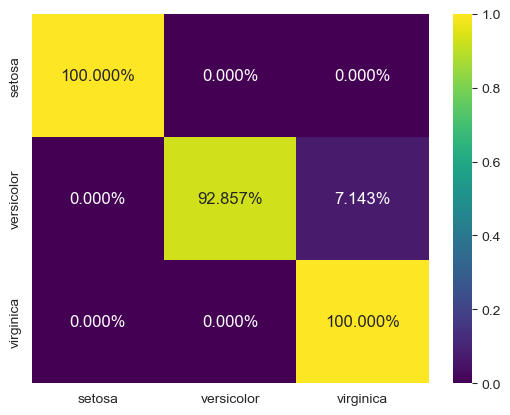

In [132]:
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(X_test_scld), axis=1) 
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(
    cm,
    annot=True,
    fmt='.3%',              
    cmap='viridis',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
);
